In [0]:
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab3/ex1.jpg
!wget -q -nc https://raw.githubusercontent.com/pseprivamirakbarnejad/cmput206lab/master/Lab3/ex2.jpg
!ls

ex1.jpg  ex2.jpg  sample_data


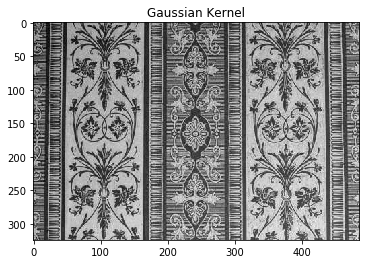

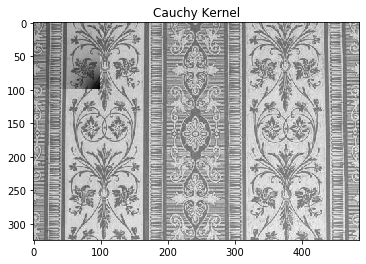

In [0]:
from skimage import io
from skimage.filters import sobel_h 
from skimage.filters import sobel_v
from skimage.filters import gaussian
from scipy import ndimage as ndi
from skimage import feature
import numpy as np
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

img = io.imread('ex1.jpg',True) 
img_G = feature.canny(img,sigma=50)
fg_img = np.zeros(img.shape)
cg_img = np.zeros(img.shape)

for x in range(0,100):
  for y in range(0,100):
    GW = 0
    CW = 0
    Gw = np.exp((-(np.square(100-x)+np.square(100-y)))/(np.square(np.std(img))))
    CW = 1/(1+(np.square(100-x)+np.square(100-y))/(np.square(np.std(img))))
    fg_img[x][y] = GW*img_G[x][y]+(1-GW)*img[x][y]
    cg_img[x][y] = CW*img_G[x][y]+(1-CW)*img[x][y]

for x in range(0,img.shape[0]):
  for y in range(0,img.shape[1]):
    if x>=100 or y>=100:
      fg_img[x][y] = img[x][y] 
      cg_img[x][y] = img[x][y] 


plt.imshow(fg_img,cmap='gray') 
plt.title("Gaussian Kernel")
plt.show()
plt.imshow(cg_img,cmap='gray') 
plt.title("Cauchy Kernel")
plt.show()